# Sample model created to predict heart disease based on medical data

# Clean and configure data

Original data from: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
Also available at: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/
        
Contains columns for 
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. condition: 0 = no disease, 1 = disease (this is the target that will be predicted in the model)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

In [3]:
%pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.6 kB 465.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.6 kB 717.5 kB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
df.shape

(297, 14)

In [10]:
df["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

160 with no heart disease, 137 with heart disease

In [11]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,False,False,False,False,False,False,False,False,False,False,False,False,False,False
293,False,False,False,False,False,False,False,False,False,False,False,False,False,False
294,False,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

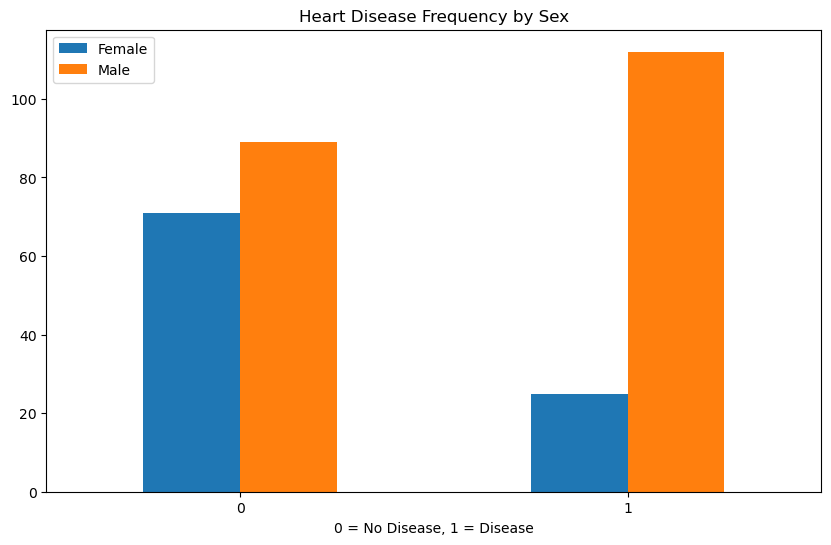

In [7]:
pd.crosstab(df.condition, df.sex).plot(kind="bar", figsize=(10,6))
plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

# Age vs Max Heart Rate

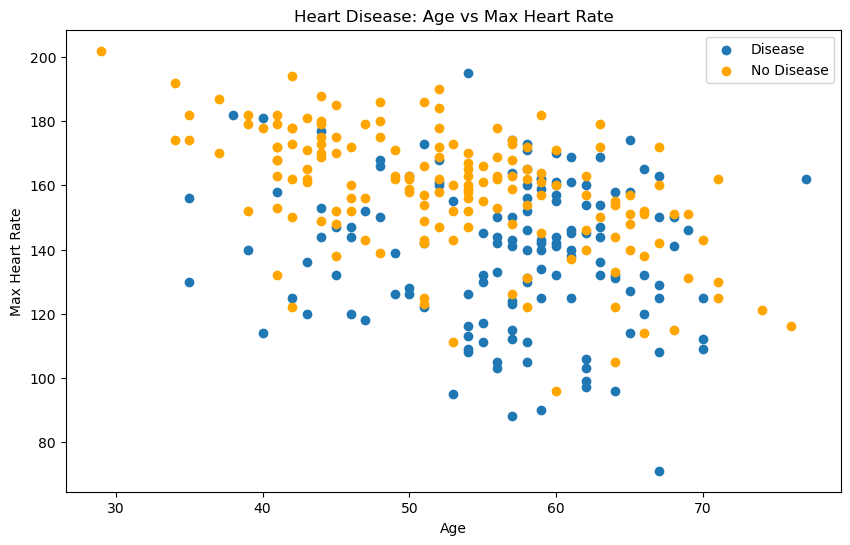

In [6]:
plt.figure(figsize=(10,6))

# Plot positive examples
plt.scatter(df.age[df.condition == 1], df.thalach[df.condition == 1]);

# Plot negative examples
plt.scatter(df.age[df.condition == 0], df.thalach[df.condition == 0], c="orange");
plt.title("Heart Disease: Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

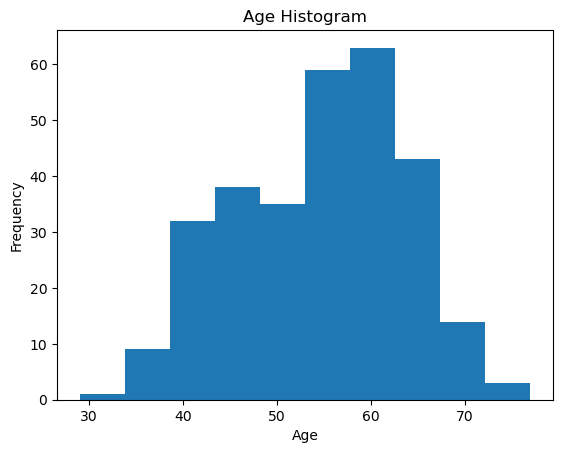

In [15]:
df.age.plot.hist();
plt.title("Age Histogram");
plt.xlabel("Age");

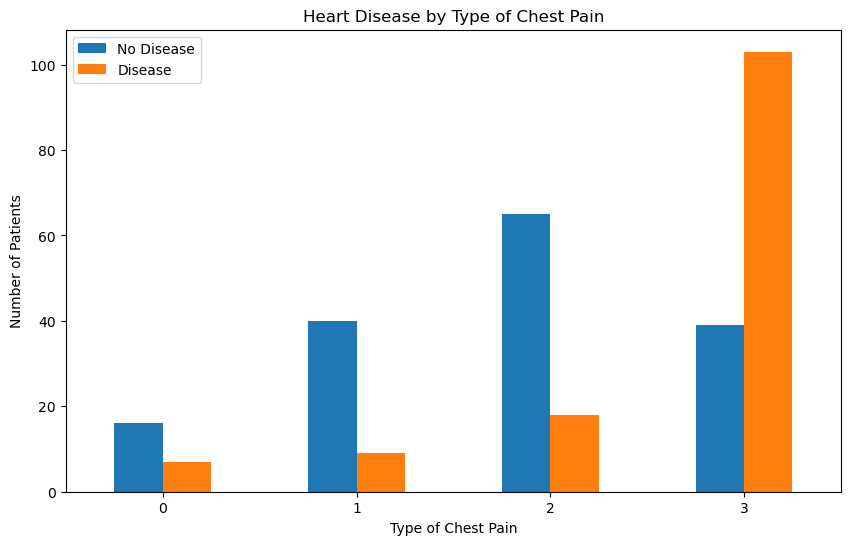

In [11]:
pd.crosstab(df.cp, df.condition).plot(kind="bar", figsize=(10,6))
plt.title("Heart Disease by Type of Chest Pain")
plt.xlabel("Type of Chest Pain")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

Value 0: typical angina -- Value 1: atypical angina -- Value 2: non-anginal pain -- Value 3: asymptomatic

(14.5, -0.5)

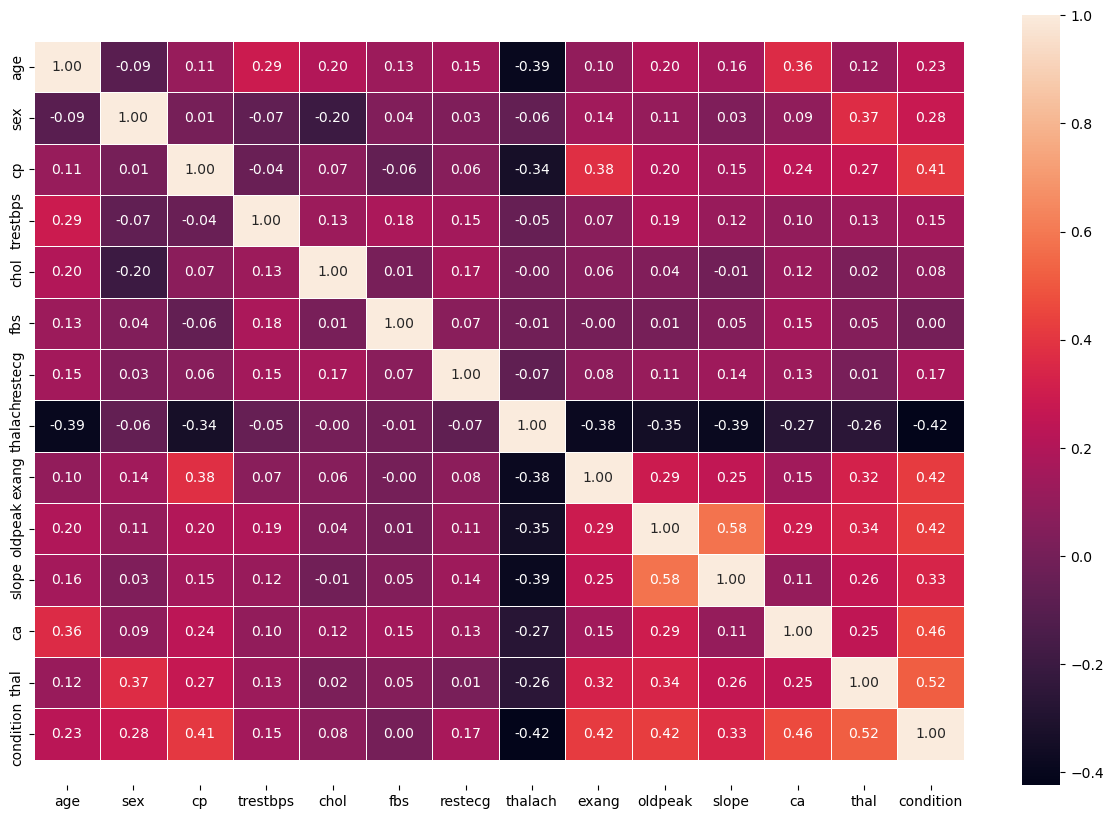

In [3]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix, 
                 annot = True, 
                 linewidths = 0.5, 
                 fmt = ".2f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

# Model the data

In [4]:
X = df.drop("condition", axis = 1)
y = df["condition"]

In [5]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
273,46,1,3,140,311,0,0,120,1,1.8,1,2,2
259,51,0,3,130,305,0,0,142,1,1.2,1,0,2
30,59,1,1,140,221,0,0,164,1,0.0,0,0,0
22,34,1,0,118,182,0,2,174,0,0.0,0,0,0
277,45,1,3,142,309,0,2,147,1,0.0,1,3,2


In [7]:
y_train.head()

273    1
259    1
30     0
22     0
277    1
Name: condition, dtype: int64

In [13]:
# Try Logistic Regression, K-Nearest Neighbors, Random Forest
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Fit and evaluate each model's accuracy, returns scores for each model
def fit_eval(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]= model.score(X_test,y_test)
    return model_scores

In [14]:
model_scores = fit_eval(models = models,
                       X_train = X_train,
                       X_test = X_test,
                       y_train = y_train,
                       y_test = y_test)
model_scores

C:\Users\twolf\Documents\sample_project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.7}

In [16]:
train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

In [17]:
train_scores

[1.0,
 0.7974683544303798,
 0.8016877637130801,
 0.7890295358649789,
 0.7763713080168776,
 0.7679324894514767,
 0.7679324894514767,
 0.7637130801687764,
 0.7383966244725738,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.729957805907173,
 0.7383966244725738,
 0.7215189873417721,
 0.7383966244725738,
 0.7426160337552743,
 0.7552742616033755,
 0.7510548523206751]

In [18]:
test_scores

[0.5166666666666667,
 0.5333333333333333,
 0.48333333333333334,
 0.5333333333333333,
 0.5666666666666667,
 0.55,
 0.55,
 0.5166666666666667,
 0.5833333333333334,
 0.5666666666666667,
 0.6166666666666667,
 0.6,
 0.5833333333333334,
 0.5833333333333334,
 0.6166666666666667,
 0.6166666666666667,
 0.6166666666666667,
 0.6,
 0.6,
 0.6]

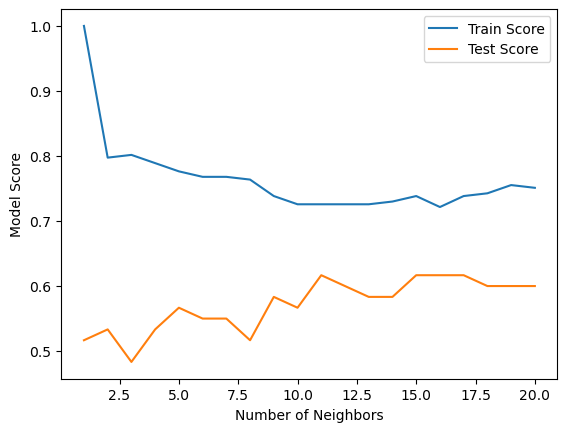

In [19]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend();

# Tune Hyperparameters

In [20]:
log_reg_grid = {"C" : np.logspace(-4, 4, 20), 
                "solver": ["liblinear"]}

np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [21]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [22]:
rs_log_reg.score(X_test, y_test)

0.7333333333333333

In [23]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1, 20 ,2)}

np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rf_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [24]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [25]:
rs_rf.score(X_test,y_test)

0.7333333333333333

In [26]:
log_reg_grid = {"C" : np.logspace(-4, 4, 20), 
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid, cv = 5, verbose = True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [27]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [28]:
gs_log_reg.score(X_test, y_test)

0.7333333333333333

In [29]:
model_scores

{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.7}

In [32]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [31]:
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

# Confusion Matrix

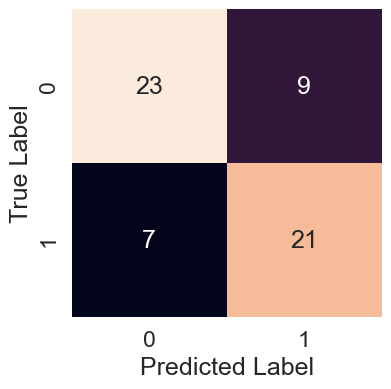

In [62]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    bottom, top = ax.get_ylim()
plot_conf_mat(y_test, y_preds)

In [64]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



# Evaluate with cross-validation

In [66]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [67]:
clf = LogisticRegression(C = 0.08858667904100823, solver = 'liblinear')

Accuracy

In [68]:
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc

array([0.7       , 0.88333333, 0.83050847, 0.94915254, 0.84745763])

In [77]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8420903954802259

Precision

In [78]:
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8918514588859416

Recall

In [79]:
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.7690476190476191

f1-Score

In [81]:
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
cv_f1 = np.mean(cv_f1) 
cv_f1

0.7986451979004114

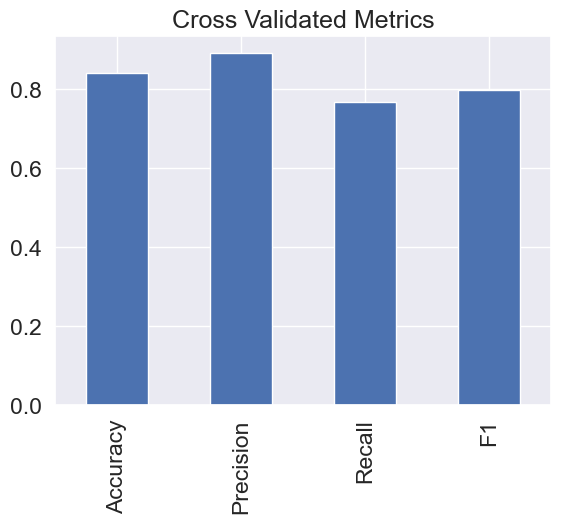

In [83]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title = "Cross Validated Metrics", legend = False);

In [84]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [85]:
clf = LogisticRegression(C = 0.08858667904100823, solver = 'liblinear')
clf.fit(X_train, y_train);

In [86]:
clf.coef_

array([[-0.01575557,  0.56288132,  0.2787732 ,  0.01871588,  0.00378119,
        -0.12665073,  0.22588847, -0.03607805,  0.27712477,  0.39885816,
         0.12417274,  0.69851039,  0.67393433]])

In [88]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.01575557240725165,
 'sex': 0.5628813236313458,
 'cp': 0.27877319658245475,
 'trestbps': 0.018715880569493117,
 'chol': 0.0037811925177674613,
 'fbs': -0.12665072690343113,
 'restecg': 0.22588847244063545,
 'thalach': -0.03607804812558726,
 'exang': 0.27712476922530754,
 'oldpeak': 0.3988581610355597,
 'slope': 0.12417274340552807,
 'ca': 0.6985103924930828,
 'thal': 0.6739343323479832}

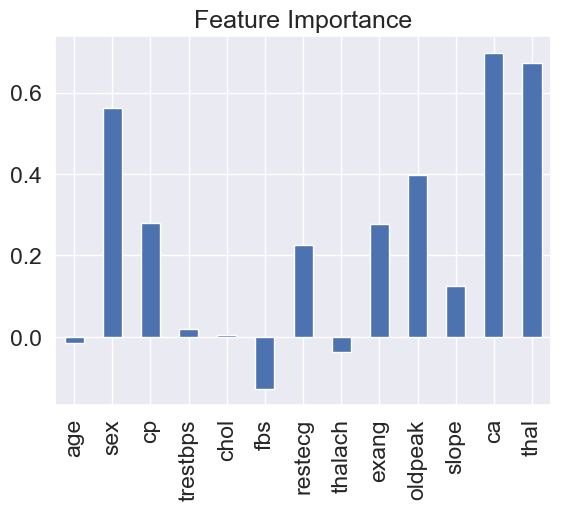

In [89]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title= "Feature Importance", legend = False);